In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [7]:
# Load dataset
train_df = pd.read_csv('train.csv')

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [10]:
# Feature engineering
# Create new features, handle missing values, encode categorical variables, etc.

# Split data into train and validation sets
train_data, val_data = train_test_split(train_df, test_size=0.2, random_state=42)

# Prepare data for model training
X_train = train_data.drop(columns=['sales'])
y_train = train_data['sales']
X_val = val_data.drop(columns=['sales'])
y_val = val_data['sales']

# Select only numeric columns
numeric_cols = X_train.select_dtypes(include=[np.number]).columns
X_train_numeric = X_train[numeric_cols]
X_val_numeric = X_val[numeric_cols]

# Train Gradient Boosting model
model = GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
model.fit(X_train_numeric, y_train)

# Make predictions
y_pred = model.predict(X_val_numeric)

# Evaluate model
mse = mean_squared_error(y_val, y_pred)
print("Validation MSE:", mse)


Validation MSE: 711116.3689699663


### Model interpretation, Analyze feature importance, coefficients, etc.

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

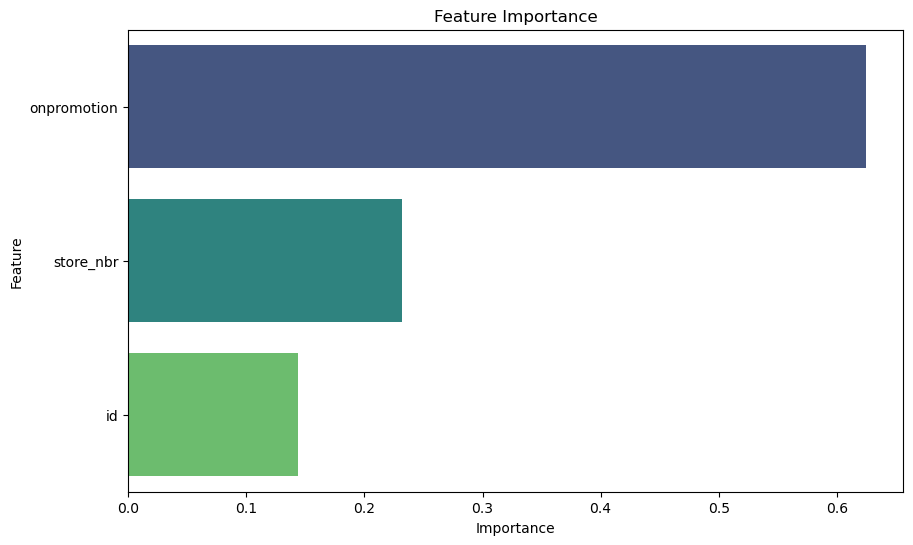

In [13]:
importances = model.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': X_train_numeric.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()


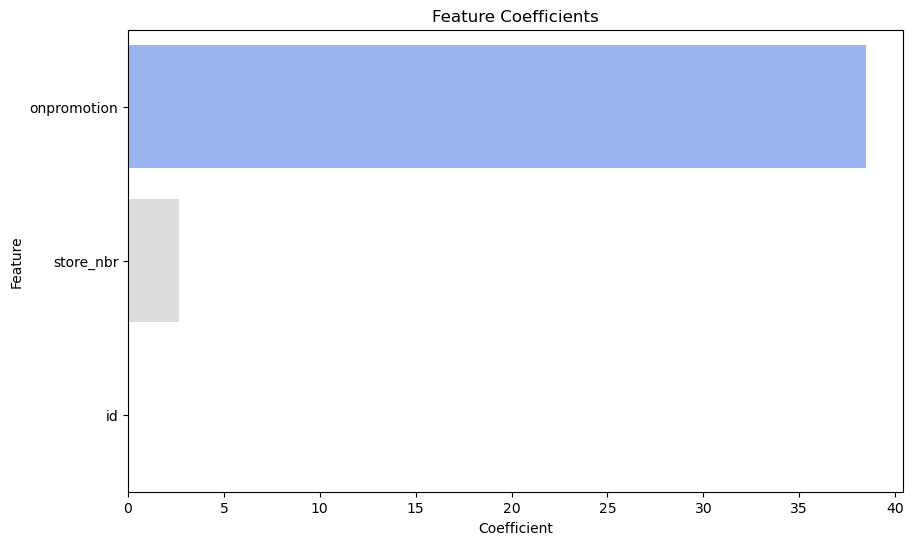

In [18]:
from sklearn.linear_model import LinearRegression

# Train a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train_numeric, y_train)

# Get coefficients
coefficients = linear_model.coef_

# Create a DataFrame to display coefficients
coefficients_df = pd.DataFrame({'Feature': X_train_numeric.columns, 'Coefficient': coefficients})
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)

# Plot coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients_df, palette='coolwarm')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Coefficients')
plt.show()


In [19]:
# Load test data
test_df = pd.read_csv('test.csv')

# Preprocess test data (same preprocessing steps as training data)
# Note: Ensure that the preprocessing steps match those used for training data

# Select only numeric columns
X_test_numeric = test_df[numeric_cols]

# Make predictions on test data
y_test_pred = model.predict(X_test_numeric)

# Create a DataFrame with the predictions
submission_df = pd.DataFrame({'id': test_df['id'], 'sales': y_test_pred})


In [20]:
# perform post-processing on predicted sales values
# Round predicted sales values to the nearest integer
y_test_pred_rounded = np.round(y_test_pred)

# Clip predicted sales values to ensure they fall within a specified range
min_sales = 0
max_sales = 1000
y_test_pred_clipped = np.clip(y_test_pred_rounded, min_sales, max_sales)


### Making a prediction

In [21]:
# Assuming X_test_numeric contains the test data with numeric features
# Make predictions on the test data
y_test_pred = model.predict(X_test_numeric)

# Print the predicted values
print("Predicted sales values:", y_test_pred)


Predicted sales values: [ 44.24745543  44.24745543 122.86473526 ... 208.12456566 985.05796758
 104.97436062]


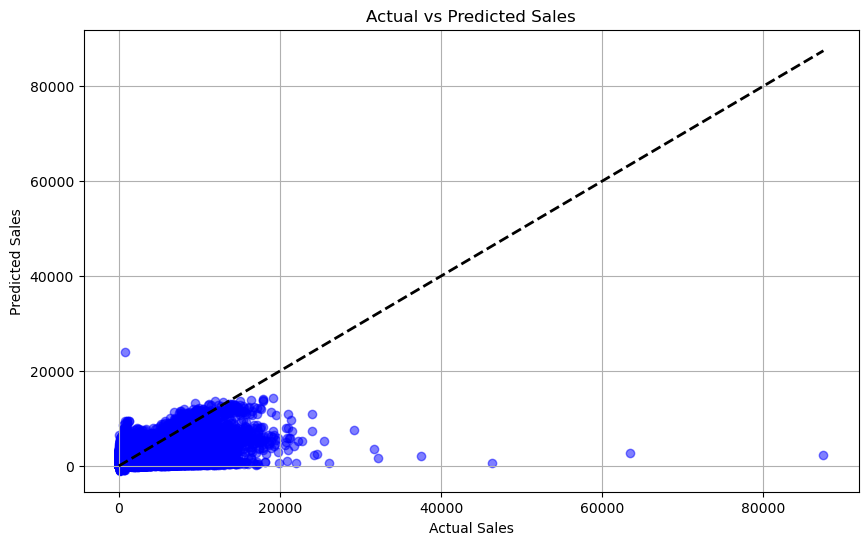

In [16]:
import matplotlib.pyplot as plt

# Plot actual vs predicted sales
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, color='blue', alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)  # Plot diagonal line
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.grid(True)
plt.show()


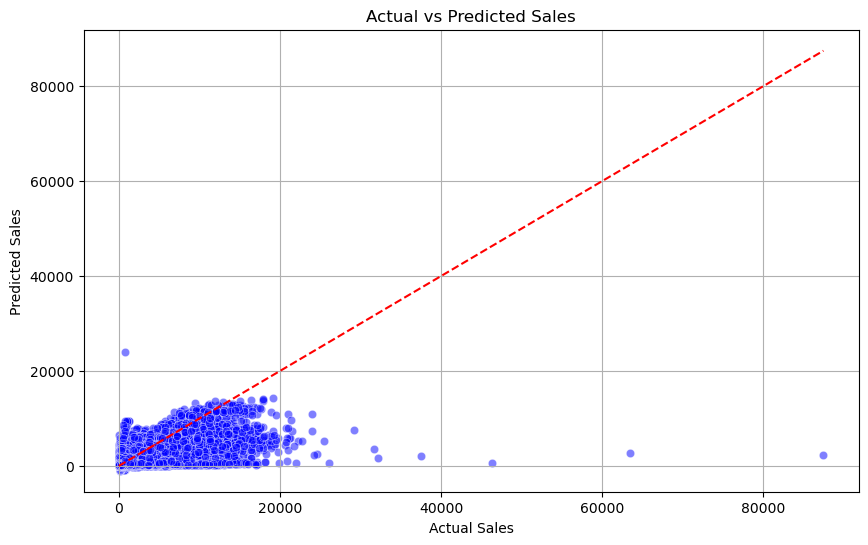

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot with actual vs predicted sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_val, y=y_pred, color='blue', alpha=0.5)
sns.lineplot(x=y_val, y=y_val, color='red', linestyle='--')  # Add a trendline
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.grid(True)
plt.show()
